In [12]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

import numpy as np 
import matplotlib
from matplotlib import pyplot

from numpy import mean
from numpy import std

from sklearn.model_selection import KFold
from keras.models import Sequential

from numpy import load



In [13]:
def load_data():
    X_train = load('X_train_2.npy')
    X_test = load('X_test_2.npy')
    y_train = load('y_train_2.npy')
    y_test = load('y_test_2.npy')
    
    return (X_train, X_test), (y_train, y_test)

In [14]:
(X_train, X_test), (y_train, y_test) = load_data()

In [15]:
print('x train shape ', x_train.shape)
print('x test shape ', x_test.shape)
print('y train shape ', y_train.shape)
print('y test shape ', y_test.shape)

x train shape  (60000, 28, 28, 1)
x test shape  (10000, 28, 28, 1)
y train shape  (60000, 10)
y test shape  (10000, 10)


In [16]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


In [17]:
model = Model([inpx], layer7)
model.compile(optimizer='adam',
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 [==============================] - 13s 12ms/step - loss: 1.0273 - accuracy: 0.6928
Epoch 2/12
120/120 [==============================] - 1s 12ms/step - loss: 0.1366 - accuracy: 0.9616
Epoch 3/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0908 - accuracy: 0.9736
Epoch 4/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0660 - accuracy: 0.9815
Epoch 5/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0547 - accuracy: 0.9843
Epoch 6/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0449 - accuracy: 0.9868
Epoch 7/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0385 - accuracy: 0.9889
Epoch 8/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0351 - accuracy: 0.9902
Epoch 9/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0306 - accuracy: 0.9910
Epoch 10/12
120/120 [==============================] - 1s 12ms/step - loss: 0.0250 - accur

In [9]:
def define_model():

    inpx = (28, 28, 1)

    inpx = Input(shape=inpx)
    layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
    layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
    layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
    layer4 = Dropout(0.5)(layer3)
    layer5 = Flatten()(layer4)
    layer6 = Dense(250, activation='sigmoid')(layer5)
    layer7 = Dense(10, activation='softmax')(layer6)
    model = Model([inpx], layer7)
    model.compile(optimizer='adam',
        loss=keras.losses.categorical_crossentropy,
        metrics=['accuracy'])
    return model

In [10]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.show()

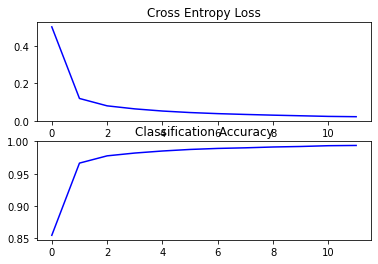

In [11]:
summarize_diagnostics([history])

In [12]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [13]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [14]:
def queimar_silicio(x_train, y_train, x_test, y_test):
    # load dataset
    # evaluate model
    scores, histories = evaluate_model(x_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 98.983
> 99.108
> 98.983
> 99.158
> 98.958


<ipython-input-10-e24d846cad31>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 1)
<ipython-input-10-e24d846cad31>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 2)


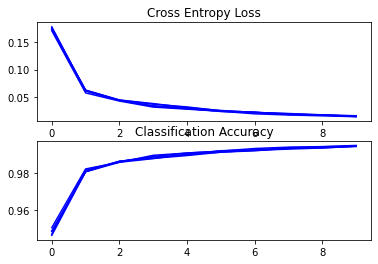

Accuracy: mean=99.038 std=0.080, n=5


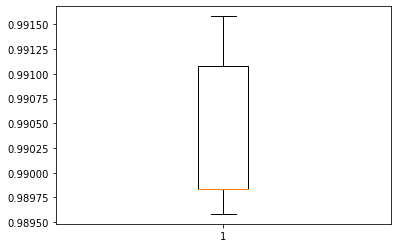

In [15]:
queimar_silicio(x_train, y_train, x_test, y_test)